# Linear regression

Import all the modules you will need in this notebook here:

In [66]:
# exercise 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [67]:
# exercise 1

def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
# My solution reads the path directly into a Path() object
filename = get_path("fram.txt")

fram = pd.read_csv(filename, sep="\t")

# Head of the new dataframe
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [68]:
# exercise 2
def rescale(series):
    return (series - series.mean()) / (2 * series.std())

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [69]:
# exercise 3
numeric_columns = fram.select_dtypes(np.number).columns
for col in numeric_columns:
    print("s" + col)
    fram["s" + col] = rescale(fram[col])
print(fram.head())


sID
sAGE
sFRW
sSBP
sSBP10
sDBP
sCHOL
sCIG
sCHD
sDEATH
sYRS_DTH
     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0  4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1  3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2  5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3  5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4  4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   

       sFRW      sSBP sSBP10      sDBP     sCHOL      sCIG      sCHD  \
0  0.834668  0.676501    NaN  1.049625 -0.914016 -0.346569 -0.035923   
1  0.496687  0.301796    NaN  0.346698 -0.730446  0.732493 -0.227056   
2  0.271367 -0.144281    NaN -0.004765 -0.233727 -0.130757 -0.227056   
3 -0.094779  0.391012    NaN  0.487283  0.489755  0.300868 -0.227056   
4 -0.179274  0.658658    NaN  0.522430  0.986475  0.516680 -0.227056   

     sDEATH  sYRS_DTH  
0  0.827181 -0.66

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [70]:
# exercise 4
fit = smf.ols("SBP ~ sFRW + sCHOL + SEX", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           4.13e-40
Time:                        21:41:15   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [71]:
# exercise 5
fit = smf.ols("SBP ~ sFRW + sCHOL + SEX + sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           2.44e-46
Time:                        21:41:15   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

Let's fit a model without `sAGE` and compare its R<sup>2</sup> to the one of the previously defined `fit`.

In [72]:
fit_no_age = smf.ols("SBP ~ sFRW + sCHOL + SEX", data=fram).fit()
increase_with_age = fit.rsquared - fit_no_age.rsquared
print(f"The presence of sAGE increased explainatory power by {increase_with_age}.")

The presence of sAGE increased explainatory power by 0.020754372327340564.


Let's check how much the different predictors explain alone the variance of the `SBP` variable.

In [73]:
predictors = ["sFRW", "sCHOL", "SEX", "sAGE"]

print(f"Explained variance of the model including all the predictors is {fit.rsquared}")
for pred in predictors:
    temp_fit = smf.ols(f"SBP ~ {pred}", data=fram).fit()
    print(f"Explained variance of predictor {pred} is {temp_fit.rsquared}")

Explained variance of the model including all the predictors is 0.1460572933325074
Explained variance of predictor sFRW is 0.11023574250895707
Explained variance of predictor sCHOL is 0.013263333041044878
Explained variance of predictor SEX is 0.019872530840802427
Explained variance of predictor sAGE is 0.031357700664498056


How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

The inclusion of `sAge` increases the R<sup>2</sup> by an amount equals to ~ 0.02, therefore the explanatory power is not a lot.

The `sFRW` parameter (normalized weight) does explain the variance the most, since by fitting all the single predictors, we see that the model with the highest R<sup>2</sup> is the one with `sFRW`. Also, being a linear model, coefficients tell us the importance of each variable, and we can see that the magnitude of the coefficient associated with `sFRW` is the biggest.

**Note:** We could have used the adjusted R<sup>2</sup>, but at this point we are interested in how much the predictor is bringing, rather than formulating a final model.

***

Try to add to the model all the interactions with other variables. 

In [74]:
# exercise 6
fit = smf.ols("SBP ~ sFRW + sCHOL + SEX + sAGE+ sFRW:sCHOL + sFRW:SEX + sCHOL:SEX + sAGE:SEX + sAGE:sCHOL + sFRW:sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           4.92e-43
Time:                        21:41:15   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

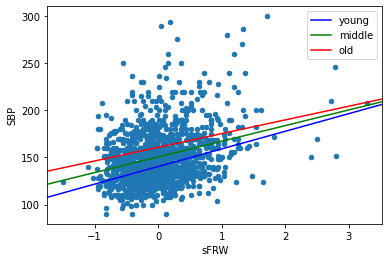

In [75]:
# exercise 7
i_y = fit.params.Intercept + fit.params.sAGE * (-1.0)
i_m = fit.params.Intercept + fit.params.sAGE * (0.0)
i_o = fit.params.Intercept + fit.params.sAGE * (1.0)

s_y = fit.params["sFRW"] + fit.params["sFRW:sAGE"] * (-1.0)
s_m = fit.params["sFRW"] + fit.params["sFRW:sAGE"] * (0.0)
s_o = fit.params["sFRW"] + fit.params["sFRW:sAGE"] * (1.0)

fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept=i_y, slope=s_y, ax=plt.gca(), color="blue", label="young")
abline_plot(intercept=i_m, slope=s_m, ax=plt.gca(), color="green", label="middle")
abline_plot(intercept=i_o, slope=s_o, ax=plt.gca(), color="red", label="old")

plt.legend();

How does the dependence of blood pressure on weight change as a person gets older?
***

As the person gets older, the pressure seems to increase less with the weight, but on average, it is higher. This can be seen from the graph where, as the person gets heavier, all the regression lines seem to be intersecting. Therefore there seem to be almost equal pressure values for the different ages at higher weights. For low weights, as age grows, average blood pressure rises too.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           2.99e-40
Time:                        21:41:17   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

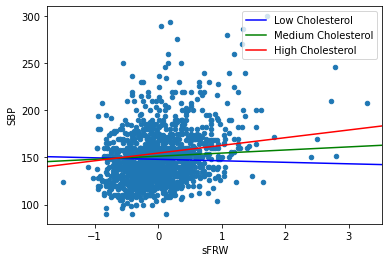

In [76]:
# exercise 8
fit = smf.ols("SBP ~ sFRW + sCHOL + SEX + sCIG + sAGE + sFRW:sCHOL + sFRW:SEX + sCHOL:SEX + sAGE:SEX + sAGE:sCHOL + sFRW:sAGE + sCIG:sFRW + sCIG:sCHOL + sCIG:SEX + sCIG:sAGE", data=fram).fit()
print(fit.summary())

i_l = fit.params.Intercept + fit.params.sCHOL * (-1.0)
i_m = fit.params.Intercept + fit.params.sCHOL * (0.0)
i_h = fit.params.Intercept + fit.params.sCHOL * (1.0)

s_l = fit.params.sCHOL + fit.params["sFRW:sCHOL"] * (-1.0)
s_m = fit.params.sCHOL + fit.params["sFRW:sCHOL"] * (0.0)
s_h = fit.params.sCHOL + fit.params["sFRW:sCHOL"] * (1.0)

fram.plot.scatter("sFRW", "SBP")

abline_plot(intercept=i_l, slope=s_l, ax=plt.gca(), color="blue", label="Low Cholesterol")
abline_plot(intercept=i_m, slope=s_m, ax=plt.gca(), color="green", label="Medium Cholesterol")
abline_plot(intercept=i_h, slope=s_h, ax=plt.gca(), color="red", label="High Cholesterol")

plt.legend();

How does the model and its accuracy look?

***

The model is not precise. While the tendency is somehow clear from the regression lines, this model is not very good to make actual predictions. This can easily be seen from the metrics such as R<sup>2</sup> which are not that high.

***

# Logistic regression

In [77]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [88]:
# exercise 9
fram["HIGH_BP"] = ((fram.SBP >= 140) | (fram.DBP >= 90)).map(int)
formula = "HIGH_BP ~ sFRW + SEX + SEX:sFRW"
print(sm)
fit = smf.glm(formula=formula, data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print(fit.summary2())
print(error_rate_orig)

<module 'statsmodels.api' from '/Users/riccardopesce/opt/miniconda3/lib/python3.9/site-packages/statsmodels/api.py'>
               Results: Generalized linear model
Model:              GLM              AIC:            1721.7340 
Link Function:      logit            BIC:            -8349.7723
Dependent Variable: HIGH_BP          Log-Likelihood: -856.87   
Date:               2021-01-01 21:51 LL-Null:        -902.60   
No. Observations:   1394             Deviance:       1713.7    
Df Model:           3                Pearson chi2:   1.39e+03  
Df Residuals:       1390             Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
Intercept         0.7631   0.0824  9.2662 0.0000  0.6017 0.9246
SEX[T.male]      -0.1624   0.1202 -1.3503 0.1769 -0.3980 0.0733
sF

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [ ]:
# exercise 10
# Put your solution here!

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

In [ ]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

How do the models with different ages and genders differ from each other?

***
Your solution here.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [ ]:
# exercise 12
# Put your solution here!

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [ ]:
# exercise 13
np.random.seed(1)
# Put your solution here!

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [ ]:
# exercise 14
# Put your solution here!

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [ ]:
# exercise 15
# Put your solution here!

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

In [ ]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [ ]:
# exercise 17
# Put your solution here!